In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [35]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

**Importing the dataset**

In [10]:
data = pd.read_csv("Social_Network_Ads.csv")

In [11]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [12]:
data = pd.concat([data,pd.get_dummies(data["Gender"],prefix = "Gender")],axis = 1)
data.drop(["Gender"],axis = 1,inplace = True)
data.head()

,User ID,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,15624510,19,19000,0,0,1
1,15810944,35,20000,0,0,1
2,15668575,26,43000,0,1,0
3,15603246,27,57000,0,1,0
4,15804002,19,76000,0,0,1


In [13]:
X = data[["Age","EstimatedSalary","Gender_Female","Gender_Male"]]
Y = data["Purchased"]
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2,random_state = 5)
X_train.head()

,Age,EstimatedSalary,Gender_Female,Gender_Male
249,35,97000,1,0
42,35,108000,0,1
297,43,112000,1,0
127,26,32000,0,1
56,23,48000,1,0


**Feature Scaling**

In [16]:
std_scaler = StandardScaler()
tr_Xtrain = std_scaler.fit_transform(X_train[["Age","EstimatedSalary"]])
tr_Xtest = std_scaler.transform(X_test[["Age","EstimatedSalary"]])

tr_Xtrain = np.concatenate((tr_Xtrain,X_train.iloc[:,2:]),axis = 1)
tr_Xtest =  np.concatenate((tr_Xtest,X_test.iloc[:,2:]),axis = 1)

**Fitting Random Forest to the Training set**

In [22]:
forest = RandomForestClassifier()
params = {"n_estimators" : [5,10,20],"criterion" : ["gini", "entropy"],"max_depth" : [2,3,4,5,6,7], 
         "min_samples_split" : [2,4,6,8,10,12,14,16,18,20],
         "max_features" : ["auto","log2","sqrt"],"class_weight":[None,"balanced"]}


gd = GridSearchCV(forest,params)
gd.fit(tr_Xtrain,y_train)
bestParameters = gd.best_params_

In [23]:
bestParameters

{'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 4,
 'max_features': 'auto',
 'min_samples_split': 8,
 'n_estimators': 10}

In [26]:
final_model = RandomForestClassifier(n_estimators = bestParameters["n_estimators"] ,criterion = bestParameters['criterion'],class_weight = bestParameters["class_weight"],
                                   max_depth = bestParameters["max_depth"],max_features = bestParameters["max_features"],
                                   min_samples_split = bestParameters["min_samples_split"])
final_model.fit(tr_Xtrain,y_train)

RandomForestClassifier(criterion='entropy', max_depth=4, min_samples_split=8,
                       n_estimators=10)

**Predicting the Test set results**

In [27]:
final_model.predict(tr_Xtest)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1], dtype=int64)

**Making the Confusion Matrix**

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


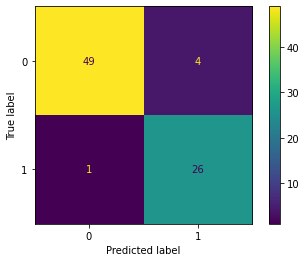

In [28]:
plot_confusion_matrix(final_model, tr_Xtest, y_test)

**Visualising the Training set results**

In [32]:
train_score = final_model.score(tr_Xtrain,y_train)
print(train_score)

0.91875


([<matplotlib.patches.Wedge at 0x1bbe658efa0>,
 [Text(-1.0643589911946993, 0.2777407745776662, 'Correctly Classified %'),
  Text(1.064358978192714, -0.27774082440390685, 'Incorrectly Classified %')],
 [Text(-0.5805594497425632, 0.15149496795145428, '91.9%'),
  Text(0.5805594426505712, -0.1514949951294037, '8.1%')])

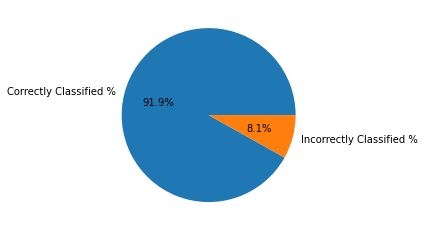

In [33]:
plt.pie([100*train_score,100 - 100*train_score],labels = ["Correctly Classified %","Incorrectly Classified %"],autopct='%1.1f%%')

**Visualising the Test set results**

In [30]:
test_score = final_model.score(tr_Xtest,y_test)
test_score

0.9375

([<matplotlib.patches.Wedge at 0x1bbe6a294f0>,
 [Text(-1.0788638084435536, 0.21459935421774148, 'Correctly Classified %'),
  Text(1.0788638084435533, -0.21459935421774162, 'Incorrectly Classified %')],
 [Text(-0.5884711682419382, 0.11705419320967717, '93.8%'),
  Text(0.5884711682419381, -0.11705419320967722, '6.2%')])

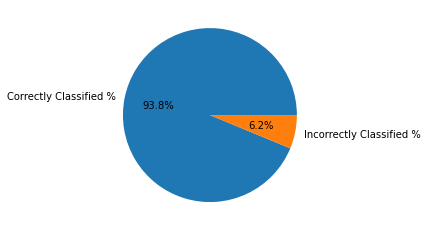

In [31]:
plt.pie([100*test_score,100 - 100*test_score],labels = ["Correctly Classified %","Incorrectly Classified %"],autopct='%1.1f%%')

Training Data F1 Score :  0.8934426229508198
Training Data F1 Score :  0.912280701754386


<BarContainer object of 2 artists>

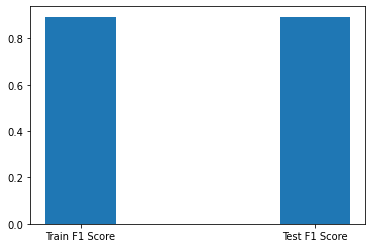

In [37]:
test_f1Score = f1_score(final_model.predict(tr_Xtest),y_test)
train_f1Score = f1_score(final_model.predict(tr_Xtrain),y_train)
print("Training Data F1 Score : ",train_f1Score)
print("Training Data F1 Score : ",test_f1Score)
plt.bar(["Train F1 Score","Test F1 Score"],[train_f1Score,train_f1Score],width = 0.3)